In [7]:
import pandas as pd
import numpy as np

In [2]:
input_file = "task1/data/train.csv"

In [3]:
train_df = pd.read_csv(input_file)

In [13]:
train_df.make.unique()

array(['bmw', nan, 'mercedes-benz', 'volvo', 'kia', 'honda', 'nissan',
       'toyota', 'mazda', 'ferrari', 'volkswagen', 'jaguar', 'opel',
       'mini', 'suzuki', 'porsche', 'lexus', 'lamborghini', 'audi',
       'proton', 'hyundai', 'bentley', 'citroen', 'maserati',
       'alfa romeo', 'mitsubishi', 'fiat', 'tesla', 'hino', 'skoda',
       'land rover', 'rolls-royce', 'mclaren', 'ssangyong', 'renault',
       'peugeot', 'subaru', 'isuzu', 'infiniti', 'chevrolet', 'dongfeng',
       'cupra', 'ford', 'yutong', 'golden dragon', 'dodge', 'mercedes',
       'seat', 'maxus', 'austin', 'mg', 'morris', 'perodua', 'byd',
       'rover', 'jeep', 'ud', 'aston martin', 'scania', 'international',
       'daf', 'alpine', 'daihatsu', 'lotus', 'hafei', 'chery', 'foton',
       'saab', 'hummer', 'iveco', 'riley', 'daimler', 'ruf', 'higer',
       'chrysler', 'man', 'joylong', 'mitsuoka'], dtype=object)

In [27]:
title_series = train_df.title.str.lower()
make_series = train_df.make.str.lower()

In [43]:
make_list = [make for make in make_series.unique() if not pd.isnull(make)]

In [44]:
for indx, comp in make_series.iteritems():
    if pd.isnull(comp):
        for make in make_list:
            if make in title_series[indx]:
                make_series[indx] = make

In [46]:
train_df.make = make_series

In [50]:
for model in train_df.model.unique():
    if pd.isnull(model):
        print(True)

In [51]:
train_df.make.unique()

array(['bmw', 'toyota', 'mercedes-benz', 'honda', 'volvo', 'kia',
       'hyundai', 'mg', 'nissan', 'mazda', 'ferrari', 'volkswagen',
       'jaguar', 'opel', 'mini', 'suzuki', 'porsche', 'mitsubishi',
       'lexus', 'lamborghini', 'audi', 'proton', 'bentley', 'citroen',
       'maserati', 'alfa romeo', 'fiat', 'tesla', 'hino', 'skoda',
       'land rover', 'rolls-royce', 'mclaren', 'ssangyong', 'renault',
       'peugeot', 'subaru', 'isuzu', 'seat', 'infiniti', 'chevrolet',
       'dongfeng', 'cupra', 'ford', 'yutong', 'golden dragon', 'dodge',
       'mercedes', 'maxus', 'austin', 'morris', 'perodua', 'byd', 'rover',
       'jeep', 'ud', 'aston martin', 'scania', 'international', 'daf',
       'alpine', 'daihatsu', 'lotus', 'hafei', 'chery', 'foton', 'saab',
       'hummer', 'iveco', 'man', 'riley', 'daimler', 'ruf', 'higer',
       'chrysler', 'joylong', 'mitsuoka'], dtype=object)

In [52]:
train_df.to_csv("task1/data/train_1.csv", index=False)

# Sample instances from dataset and perform clustering

In [114]:
import pandas as pd
import numpy as np
import re
import string

In [115]:
input_file = "task1/data/train_1.csv"

In [116]:
train_df = pd.read_csv(input_file)

In [117]:
# gen = np.random.default_rng()
# random_int_array = gen.choice(a=16784, size=1000, replace=False)

In [118]:
features_series = train_df.features
features_series.dropna(inplace=True)

accessories_series = train_df.accessories
accessories_series.dropna(inplace=True)

In [119]:
# features_rand_series = features_series[random_int_array]
# accessories_rand_series = accessories_series[random_int_array]

In [120]:
pattern = re.compile("\. | \.|! ")

In [121]:
def fun_accessory(str_, pattern):
    str_1 = str_1.lower()
        
    if len(str_1) > 1:
        str_1 = pattern.sub(",", str_1)
        str_1 = str_1.strip()
        
        return [token.strip(string.punctuation+" \n\t") for token in str_1.split(",") if len(token.strip()) > 2]
    else:
        return []

In [122]:
set_2 = set()

for accessory in accessories_series.values:
    tmp_list = fun(str(accessory), pattern)
    for item in tmp_list:
        set_2.add(item)

In [123]:
# # str_1 = 'low mileage well maintained, 1 owner. view specs of the nissan latio sport'
# # str_1 = "5.7cc ferrari v12 engine, 509 bhp at 7200 rpm, torque: 434 lb ft at 5200 rpm, 0 to 100 4.2sec, quarter mile, 12.6 sec. view specs of the ferrari 575m maranello"
# str_1 = "3.0l v6 engine. 175kw  power. 293 nm torque. 8.3s  acceleration. 237 km/h top speed. 6 speed  transmission. rear wheel drive. view specs of the jaguar xf "

In [124]:
def fun_feature(str_, pattern):
    str_1 = str_1.lower()
    indx = str_1.find("view specs")
    
    if indx >= 0:
        str_1 = str_1[:indx]
        
    if len(str_1) > 1:
        str_1 = pattern.sub(",", str_1)
        str_1 = str_1.strip()
        
        return [token.strip(string.punctuation+" \n\t") for token in str_1.split(",") if len(token.strip()) > 2]
    else:
        return []

In [125]:
set_1 = set()

for feature in features_series.values:
    tmp_list = fun(str(feature), pattern)
    for item in tmp_list:
        set_1.add(item)

In [126]:
print(len(set_1))
print(len(set_2))
set_1.update(set_2)
print(len(set_1))

17799
19928
36331


# Clustering

In [130]:
from sentence_transformers import SentenceTransformer, util
import json



In [131]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [132]:
pool_list = []
match_dict = {}
encoding_dict = {}

In [133]:
%time
for text in list(set_1):
    text_encoding = model.encode([text])
    similar = False
    
    max_score = None
    max_loc = None

    for loc in range(len(pool_list)):
        sim_score = util.pytorch_cos_sim(encoding_dict[loc], text_encoding).numpy()[0][0]

        if sim_score > 0.70:
            similar = True
            
            if max_score == None or sim_score > max_score:
                max_score = sim_score
                max_loc = loc

    if not similar:
        pool_list.append(text)
        encoding_dict[len(pool_list)-1] = text_encoding
        match_dict[len(pool_list)-1] = []
    else:
        match_dict[max_loc].append((text, max_score))

CPU times: user 22 µs, sys: 0 ns, total: 22 µs
Wall time: 45.8 µs


In [141]:
with open("task1/data/feature_simi_final.jsonl", "w") as out_f:
    for indx in range(len(pool_list)):
        list_ = match_dict[indx]
        sorted_list = sorted(list_, key=lambda x: x[1], reverse=True)
        
        if len(sorted_list) > 0:
            tmp_dict = {"{}".format(pool_list[indx]): []}
            for i in range(int(len(sorted_list)/2)):
                tmp_dict[pool_list[indx]].append(sorted_list[i])
        
            out_f.write(str(tmp_dict)+"\n")

# Extracts features and outliers from extracted clusters

In [145]:
import json, ast

In [146]:
input_file = "task1/data/feature_simi_final.jsonl"
feature_file = "task1/data/feature.jsonl"
outlier_file = "task1/data/outlier.jsonl"

In [171]:
counter = 0
feature_instances_list = []
global_dict = {}

with open(feature_file, "w") as feat_f:
    with open(outlier_file, "w") as outlier_f:
        with open(input_file, "r") as in_f:
            for line in in_f:
                dict_obj = ast.literal_eval(line)
                
                for key in dict_obj.keys():
                    if len(dict_obj[key]) > 0:
                        tmp_dict = {"feature_{}".format(counter): (key, dict_obj[key][-1][1], len(dict_obj[key]))}
                        global_dict["feature_{}".format(counter)] = (key, dict_obj[key][-1][1], len(dict_obj[key]))
                        feature_instances_list.append(len(dict_obj[key]))
                        feat_f.write(json.dumps(tmp_dict)+"\n")
                        counter += 1
                    else:
                        outlier_f.write(line)

In [182]:
sorted_global_dict = dict(sorted(global_dict.items(), key=lambda x: x[1][2], reverse=True))
with open("task1/data/sorted_feature.jsonl", "w") as out_f:
    for key in sorted_global_dict.keys():
        out_f.write(json.dumps({key: sorted_global_dict[key]})+"\n")

In [156]:
freq_df = pd.DataFrame({"feature": range(len(feature_instances_list)), "frequency": feature_instances_list})

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/saurabh/venvs/general_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


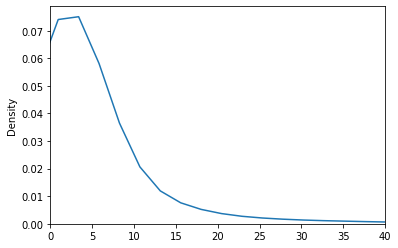

In [155]:
fig, ax = plt.subplots()
sns.distplot(feature_instances_list, ax=ax, hist=False)
ax.set_xlim(0,40)
plt.show()

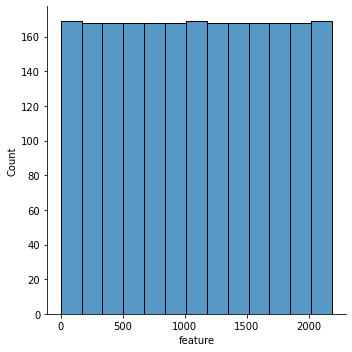

In [169]:
sns.displot(data=freq_df, x="feature")

# Assign features to train dataset

In [197]:
import json, string
from sentence_transformers import SentenceTransformer, util

In [206]:
test_df = pd.read_csv("task1/data/test.csv")

features_series = test_df.features#train_df.features
accessories_series = test_df.accessories#train_df.accessories

print(len(features_series))
print(len(accessories_series))
len_ = len(accessories_series)

5000
5000


In [207]:
input_file = "task1/data/sorted_feature.jsonl"

In [208]:
feature_dict = {}
with open(input_file, "r") as in_f:
    for line in in_f:
        dict_obj = json.loads(line)
        
        for key in dict_obj.keys():
            feature_dict[key] = dict_obj[key]
            
print(len(feature_dict))

2187


In [209]:
data_dict = {}
for key in feature_dict.keys():
    data_dict[key] = [0]*len_

In [210]:
pattern = re.compile("\. | \.|! ")

In [211]:
%%time
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

feature_phrase_encoding_dict = {}

for key in feature_dict.keys():
    feature_phrase_encoding_dict[key] = model.encode([feature_dict[key][0]])

CPU times: user 49.3 s, sys: 617 ms, total: 49.9 s
Wall time: 38.6 s


In [212]:
%%time
def fun_accessory(str_1, pattern):
    str_1 = str_1.lower()
        
    if len(str_1) > 1:
        str_1 = pattern.sub(",", str_1)
        str_1 = str_1.strip()
        
        return [token.strip(string.punctuation+" \n\t") for token in str_1.split(",") if len(token.strip()) > 2]
    else:
        return []
    

def fun_feature(str_1, pattern):
    str_1 = str_1.lower()
    indx = str_1.find("view specs")
    
    if indx >= 0:
        str_1 = str_1[:indx]
        
    if len(str_1) > 1:
        str_1 = pattern.sub(",", str_1)
        str_1 = str_1.strip()
        
        return [token.strip(string.punctuation+" \n\t") for token in str_1.split(",") if len(token.strip()) > 2]
    else:
        return []
    

def get_feature_list(token_list):
    feature_set = set()
    
    for token in token_list:
        token_encoding = model.encode([token])
        
        max_key = None
        max_score = None
        
        for key in feature_dict.keys():
            sim_score = util.pytorch_cos_sim(feature_phrase_encoding_dict[key], token_encoding).numpy()[0][0]
            
            if (sim_score >= feature_dict[key][1]) and (max_score == None or sim_score > max_score):
                max_score = sim_score
                max_key = key
                
        if max_key != None:
            feature_set.add(max_key)
            
    return list(feature_set)


for index in range(len_):
    acc_list = []
    if not pd.isnull(accessories_series[index]):
        acc_list = fun_accessory(str(accessories_series[index]), pattern)
        
    feat_list = []
    if not pd.isnull(features_series[index]):
        feat_list = fun_feature(str(features_series[index]), pattern)
        
    feat_list.extend(acc_list)
    
    extracted_feature_list = get_feature_list(feat_list)
    
    for feat in extracted_feature_list:
        data_dict[feat][index] = 1

    if index%500 == 0:
        print(index)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
CPU times: user 5h 51min 32s, sys: 1min 45s, total: 5h 53min 17s
Wall time: 6h 10min 43s


In [213]:
data_df = pd.DataFrame(data_dict)

output_df = pd.concat([test_df, data_df], axis=1)
output_df.to_csv("task1/data/test_2.tsv", sep="\t", index=False)

# features and accessories scaling at test time

In [ ]:
import json, string
from sentence_transformers import SentenceTransformer, util

In [ ]:
input_file = "task1/data/sorted_feature.jsonl"
test_df = pd.read_csv("task1/data/test.csv")

features_series = test_df.features#train_df.features
accessories_series = test_df.accessories#train_df.accessories

print(len(features_series))
print(len(accessories_series))
len_ = len(accessories_series)

In [ ]:
feature_dict = {}
with open(input_file, "r") as in_f:
    for line in in_f:
        dict_obj = json.loads(line)
        
        for key in dict_obj.keys():
            feature_dict[key] = dict_obj[key]
            
print(len(feature_dict))

In [ ]:
data_dict = {}
for key in feature_dict.keys():
    data_dict[key] = [0]*len_

In [ ]:
pattern = re.compile("\. | \.|! ")

In [ ]:
%%time
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

feature_phrase_encoding_dict = {}

for key in feature_dict.keys():
    feature_phrase_encoding_dict[key] = model.encode([feature_dict[key][0]])

In [ ]:
%%time
def fun_accessory(str_1, pattern):
    str_1 = str_1.lower()
        
    if len(str_1) > 1:
        str_1 = pattern.sub(",", str_1)
        str_1 = str_1.strip()
        
        return [token.strip(string.punctuation+" \n\t") for token in str_1.split(",") if len(token.strip()) > 2]
    else:
        return []
    

def fun_feature(str_1, pattern):
    str_1 = str_1.lower()
    indx = str_1.find("view specs")
    
    if indx >= 0:
        str_1 = str_1[:indx]
        
    if len(str_1) > 1:
        str_1 = pattern.sub(",", str_1)
        str_1 = str_1.strip()
        
        return [token.strip(string.punctuation+" \n\t") for token in str_1.split(",") if len(token.strip()) > 2]
    else:
        return []
    

def get_feature_list(token_list):
    feature_set = set()
    
    for token in token_list:
        token_encoding = model.encode([token])
        
        max_key = None
        max_score = None
        
        for key in feature_dict.keys():
            sim_score = util.pytorch_cos_sim(feature_phrase_encoding_dict[key], token_encoding).numpy()[0][0]
            
            if (sim_score >= feature_dict[key][1]) and (max_score == None or sim_score > max_score):
                max_score = sim_score
                max_key = key
                
        if max_key != None:
            feature_set.add(max_key)
            
    return list(feature_set)


for index in range(len_):
    acc_list = []
    if not pd.isnull(accessories_series[index]):
        acc_list = fun_accessory(str(accessories_series[index]), pattern)
        
    feat_list = []
    if not pd.isnull(features_series[index]):
        feat_list = fun_feature(str(features_series[index]), pattern)
        
    feat_list.extend(acc_list)
    
    extracted_feature_list = get_feature_list(feat_list)
    
    for feat in extracted_feature_list:
        data_dict[feat][index] = 1

    if index%500 == 0:
        print(index)

In [ ]:
data_df = pd.DataFrame(data_dict)

output_df = pd.concat([test_df, data_df], axis=1)
output_df.to_csv("task1/data/test_2.tsv", sep="\t", index=False)

# Scaling price column

In [15]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [2]:
input_file = "task1/data/train_2.tsv"
train_df = pd.read_csv(input_file, sep="\t")

In [18]:
min_max_scaler = MinMaxScaler()
price_series = train_df.price
print(len(price_series))

price_series.dropna(inplace=True)
print(len(price_series))
price_series = price_series.values.reshape(-1, 1)
scaled_price = min_max_scaler.fit_transform(price_series)
squeezed_price = np.squeeze(scaled_price)

16784
16784


In [20]:
output_df = pd.concat([train_df, pd.Series(squeezed_price, name="scaled_description").to_frame()], axis=1)
output_df.to_csv("task1/data/train_3.tsv", sep="\t", index=False)